In [ ]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from data_cube import DataCube
from ssm import SSM

In [ ]:
dc = DataCube(
    subjects=["01"],
    gestures=["1", "2", "3", "4"],
    channels=["2", "4", "5", "6", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.get_max_obs(smooth=True)

s1g101 = SSM(dc.data_set_smooth["01"]["1_0_1"][:, :2]) # exclude label col
s1g101.normalize_modalities()
s1g101.calc_SSM()
s1g101.plot_SSM(0)

s1g111 = SSM(dc.data_set_smooth["01"]["1_1_1"][:, :2]) # exclude label col
s1g111.normalize_modalities()
s1g111.calc_SSM()
s1g111.plot_SSM(0)

s1g101.calc_sim_matrix()
s1g101.plot_SSM(0)

s1g111.calc_sim_matrix()
s1g111.plot_SSM(0)

---

### Using `SNF` Class

In [ ]:
from snf import SNF

In [ ]:
snf_tst = SNF(dc.data_set_smooth["01"]["4_1_1"][:, :6], k=0.1)
snf_tst.normalize_modalities()

In [ ]:
snf_tst.calc_SSM()

In [ ]:
# channel 2
snf_tst.plot_SSM(0)

In [ ]:
# channel 4
snf_tst.plot_SSM(1)

In [ ]:
# channel 5
snf_tst.plot_SSM(2)

In [ ]:
# channel 6
snf_tst.plot_SSM(3)

In [ ]:
# channel 8
snf_tst.plot_SSM(4)

In [ ]:
snf_tst.calc_sim_matrix()

In [ ]:
# channel 2
snf_tst.plot_SSM(0)

In [ ]:
# channel 4
snf_tst.plot_SSM(1)

In [ ]:
# channel 5
snf_tst.plot_SSM(2)

In [ ]:
# channel 6
snf_tst.plot_SSM(3)

In [ ]:
# channel 8
snf_tst.plot_SSM(4)

In [ ]:
snf_tst.calc_transition_matrix()
snf_tst.calc_similarity_graph(0.1)

In [ ]:
snf_tst.network_fusion()

In [ ]:
snf_tst.plot_template()

In [ ]:
snf_tst.plot_template(0, fused=False)

In [ ]:
snf_tst.plot_template(1, fused=False)

In [ ]:
snf_tst.plot_template(2, fused=False)

In [ ]:
snf_tst.plot_template(3, fused=False)

In [ ]:
snf_tst.plot_template(4, fused=False)

---

In [12]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from data_cube import DataCube
from ssm import SSM

In [13]:
dc = DataCube(
    subjects=["01"],
    gestures=["1", "2", "3", "4"],
    channels=["2", "4", "5", "6", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.get_max_obs(smooth=True)

In [14]:
from snf2 import SNF

In [15]:
snf_tst = SNF(dc.data_set_smooth["01"]["4_1_1"][:, :6], k=0.2)
snf_tst.normalize_modalities()

In [16]:
snf_tst.calc_weights()

In [17]:
snf_tst.normalize_weights()

CPU times: user 1.14 ms, sys: 0 ns, total: 1.14 ms
Wall time: 628 µs


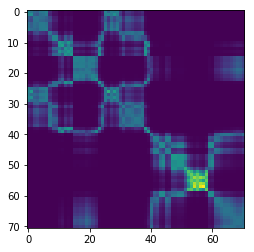

In [18]:
plt.imshow(snf_tst.P[0,:,:])
plt.show()

In [19]:
snf_tst.calc_knn_weights()

In [20]:
snf_tst.normalize_knn_weights()

CPU times: user 0 ns, sys: 1.52 ms, total: 1.52 ms
Wall time: 1.01 ms


In [21]:
snf_tst.P_knn.shape

(5, 71, 71)

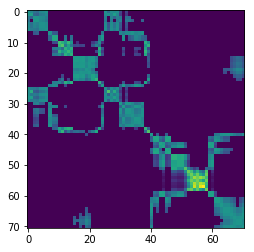

In [11]:
plt.imshow(snf_tst.P_knn[0,:,:])
plt.show()